# 反向传播算法
根据上一次实验，我们了解了手写字体识别，但是还没有对神经的反向传播算法做过多的推导。  
借助上一次的代码结合附件：反向传播推导公式.pdf，来对反向传播算法的原理以及实现进行实验。

In [1]:
import numpy
from scipy.io import loadmat#读取mat文件
import matplotlib.pyplot as plt

### 激活函数sigmoid

In [2]:
def sigmoid(z):
    return 1/(1+numpy.exp(-z))

### 对激活函数的求导，方向传播求偏导的时候要用

In [3]:
def Dsigmoid(z):
    return sigmoid(z)*(1-sigmoid(z))

### 获取数据

In [4]:
def getData():
    data=loadmat("ex4data1.mat")
    x=numpy.insert(data['X'],0,numpy.ones((5000)),axis=1)
    y=numpy.array(data['y'])
    ynum=numpy.array(data['y'])
    y=numpy.zeros((x.shape[0],10))
    for i in range(len(ynum)):
        y[i][ynum[i]-1]=1
    theta1=(numpy.random.random((25,x.shape[1]))-0.5)*0.25
    theta2=(numpy.random.random((10,26))-0.5)*0.25
    # theta1=numpy.array(numpy.load('theta1.npy'))
    # theta2=numpy.array(numpy.load('theta2.npy'))
    return x,y,theta1,theta2

### 向前传播

In [5]:
def propagate_forward(x,theta1,theta2):
    z1=x@theta1.T
    h1=sigmoid(z1)
    h1=numpy.insert(h1,0,numpy.ones((5000)),axis=1)
    z2=h1@theta2.T
    h2=sigmoid(z2)
    return h2,h1

### 计算代价

In [6]:
def cost(y,h2,theta1,theta2,L):
    m=y.shape[0]
    price=(-y*numpy.log(h2)-(1-y)*numpy.log(1-h2)).sum()/m
    regularization=(numpy.power(theta1,2).sum()+numpy.power(theta2,2).sum())*L/(2*m)
    return price+regularization

### 反向传播算法的实现
根据附件的推到可知，对于隐藏层到输出层的权重（10*26的矩阵，10表示为输出的10和onehot编码，  
对应0-9，26表示对应每个输出的隐藏层到输出层的权重),其公式如下
$$[h(x)-y] \frac{\partial x}{\partial w}$$

实现过程是对5000的样本进行循环，每一次循环得到一个10*26的梯度下降矩阵呢个，用来更新隐藏层到输出层的权重。  
反向传播代码中的decline2即为所求的隐藏层到输出层的偏导，用总误差去矩阵乘隐藏层的输出  
其中，decline1的计算则较为复杂，因为对输入层到隐藏层求偏导，其误差涉及到隐藏层到输出层的误差，也就是需要根据链式求导法则  
找到隐藏层到输出层的误差。根据附件推导公式如下
$$[h(x)-y] \text { theta2 } h(z)(1-h(z)) x$$
代码实现可知，a表示总体误差与隐藏层到输出层的权重进行矩阵乘，b表示对隐藏层的激活函数进行求导，然后与输入进行矩阵乘，得到的a，b然后进行普通乘即得到总体误差对输入层到隐藏层的偏导。


In [7]:
def back_propagation(theta1,theta2,x,errorValue,h1,dh1):
    decline2=numpy.zeros((10,26))
    decline1=numpy.zeros((25,401))
    for i in range(5000):
        #隐藏层到输出层偏导
        decline2=decline2+errorValue[i].reshape(-1,1) @ h1[i].reshape(-1,1).T

        a=errorValue[i].reshape(-1,1).T@theta2
        b=dh1[i].reshape(-1,1)@x[i].reshape(-1,1).T

        decline1=decline1+a[:,1:].T*b
    return decline1,decline2

### 训练神经网络

In [8]:
def neural_networks(epoch,speed):
    x,y,theta1,theta2=getData()
    costs=[]
    for i in range(epoch):
        h2,h1=propagate_forward(x,theta1,theta2)
        j=cost(y,h2,theta1,theta2,1)
        errorValue=h2-y
        dh1=Dsigmoid(x@theta1.T)
        decline1,decline2=back_propagation(theta1,theta2,x,errorValue,h1,dh1)
        theta1=theta1-speed*decline1
        theta2=theta2-speed*decline2
        costs.append(j)
    plt.plot(costs)
    numpy.save('theta1.npy',theta1)
    numpy.save("theta2.npy",theta2)
    print("最小代价",j)
    return theta1,theta2

### 绘制代价以及正确率

In [9]:
def test(theta1,theta2):
    x,y,_,_=getData()
    # theta1=numpy.array(numpy.load("./theta12.npy"))
    # theta2=numpy.array(numpy.load("./theta22.npy"))
    h2,h1=propagate_forward(x,theta1,theta2)
    h2[h2>0.5]=1
    h2[h2<=0.5]=0
    rigth=0
    for i in range(5000):
        if (h2[i,:]==y[i,:]).sum()==10:
            rigth+=1
    print("正确个数：",rigth,"，正确率：",rigth/5000)

最小代价 0.9513138655725142
正确个数： 4591 ，正确率： 0.9182


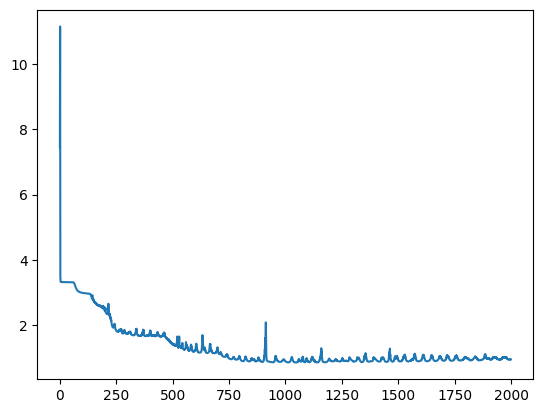

In [10]:
theta1,theta2=neural_networks(2000,0.001)
test(theta1,theta2)